# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Dr. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>


----
#### <center>RA, Turma e nome dos componentes do grupo</center>

    
| RA       | Turma        |      Nome     |
|:-        |:-            |:-------------:|
|210126    |CP701TIN1|Diogo Pereira Almeida| 
    

----
### Instruções

**1**. Leia atentamente esta seção e as descrições de cada exercício para garantir que você está executando o que foi pedido.
- O não atendimento de qualquer item descrito, implicará perda de nota.

**2**. O trabalho pode ser feito em grupos de no mínimo 2 pessoas e no máximo 5 pessoas.
 - Apenas uma pessoa do grupo deve submeter o trabalho.
 - Você deve submeter apenas o arquivo .ipynb.
 - O grupo poderá ser composto por pessoas de qualquer uma das três turmas de processamento de imagens

**3**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções
- comentar o código sempre que necessário

**4**. Cuidado com plágio. Se for detectado plágio entre grupos, a punição será dada para todos os componentes dos grupos envolvidos.

**5**. Antes de submeter o notebook, certifique-se que não há erros de código. Uma forma de se certificar disso é usar a opção **"Reiniciar Kernel e executar todas as células"** do Jupyter ou a opção **"Reiniciar e executar tudo"** do Google Colab.

**6**. A única biblioteca de processamento de imagens permitida neste trabalho é a **OpenCV**. Porém, alguns exercícios poderão limitar algumas funções dessa biblioteca que poderão ser usadas.
- Mesmo nos exercícios que limitam o uso de funções da OpenCV, considere que as operações básicas como abrir, transformar para outro formato de cor e salvar, podem ser feitas com as funções da biblioteca.

**7**. Em todos os exercícios que pedirem para salvar a imagem resultante, tome cuidado de converter a imagem para BGR antes de salvá-la pois esse é o formato padrão da biblioteca OpenCV. Caso contrário, os canais de cores da imagem resultante ficarão trocados.

**8**. Em todos os exercícios, plote na tela as mesmas imagens que o exercício pedir para salvar.
- Não é permitido usar a função cv2.imshow() para plotar as imagens. Essa regra é para evitar incompatibilidade e prejudicar a correção. Sempre use a biblioteca matplotlib.

**9**. Em todos os exercícios, as imagens finais solicitadas devem estar no formato **uint8**.

**10**. Em todos os exercícios você deve tratar tons de cinza inválidos usando a técnica de saturação, há não ser que seja explicitamente pedida outra técnica. Sempre tome cuidado para que as operações executadas não causem desequilíbrio de cores.

----
## Preparação

Abaixo são inicializadas as bibliotecas e é definido o caminho das pasta **figs** onde estão as imagens usadas em cada exercício. É definido também o caminho da pasta **figs_resultado**, onde você deve salvar as imagens resultantes.

Se for necessário, você pode alterar a variável que define esse caminho, porém use ela em todos os exercícios.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

pathFigs = "figs/" # path das imagens que devem ser usadas
pathRes = "figs_resultado/" # path da pasta onde as imagens devem ser salvas

# Cria uma pasta onde as imagens devem ser salvas, se ela não existir
if not os.path.isdir(pathRes):
    os.mkdir(pathRes)

----
## Exercicio 1
Faça uma função que receba dois parâmetros:
 - **imagem1**: uma imagem monocromática ou RGB
 - **imagem2**: uma imagem do mesmo tamanho que a imagem anterior, mas que seja toda preta e que possua apenas um retângulo na cor branca
    
Essa função deve retornar qual a quantidade mínima total de bytes que seria necessário para representar a região da **imagem1** que está localizada na mesma posição do retângulo da **imagem2**.

Teste sua função usando as imagens **figs/natureza.jpeg** e **figs/natureza_regiao.jpeg**.

Obs: não é permitido usar nenhuma função pronta da biblioteca OpenCV.

In [ ]:
def minBytesForImage(natureza, natureza_regiao):
    altImg = natureza_regiao.shape[0]
    largImg = natureza_regiao.shape[1]

    alt_brancos = []
    larg_brancos = []

    for i in range(altImg):
        for j in range(largImg):
            # Verificando se o pixel é branco (todos os canais de cor são 255)
            if np.array_equal(natureza_regiao[i, j], [255, 255, 255]):
                alt_brancos.append(i)
                larg_brancos.append(j)

    # Encontrando os limites do retângulo branco
    min_alt = min(alt_brancos)
    max_alt = max(alt_brancos)
    min_larg = min(larg_brancos)
    max_larg = max(larg_brancos)

    # Área da imagem 'natureza' representada pelo retangulo branco
    natureza_cortada = natureza[min_alt:max_alt, min_larg:max_larg]

    # Calculando a área do retângulo branco
    area = (max_alt - min_alt + 1) * (max_larg - min_larg + 1)

    # verificando o canal de cor (se é tupla ou se tem apenas se shape possui apenas 2 argumentos)
    canal_cor = 3 if len(natureza.shape) == 3 else 1

    # descobrir numero de tons de cinza da posição do retangulo na imagem 'natureza'
    tons_de_cinza = np.unique(natureza_cortada)
    numero_de_tons_de_cinza = max(tons_de_cinza)

    # descobrir profundidade da imagem
    profundidade = np.log2(numero_de_tons_de_cinza + 1)

    # Calculando o tamanho em bytes da imagem natureza
    tamanho_pixels = area * canal_cor * np.ceil(profundidade)

    return np.ceil(tamanho_pixels/8)

natureza = cv2.imread('figs/natureza.jpeg')
natureza_regiao = cv2.imread('figs/natureza_regiao.jpeg')

min_bytes = minBytesForImage(natureza, natureza_regiao)
print("Bytes minimos necessários:", min_bytes)


Bytes minimos necessários: 91471.0


----
## Exercicio 2

Use as imagens **figs/procurado.jpg** e **figs/tripaSeca.png** para criar um cartaz de procurado igual ao apresentado na imagem na imagem **figs/tripaSeca_procurado.png**.

Você pode aplicar qualquer técnica aprendida na disciplina e qualquer sequência de operações para chegar no resultado esperado. Porém, sugere-se a seguinte sequência:
- Remova o texto do cartaz usando máscara de cor, conforme ensinado no notebook de operações aritméticas. Porém, em vez de aplicar na imagem inteira, selecione apenas a região onde está o texto para facilitar.
- Ao remover o texto, ficarão marcas do texto antigo. Para removê-las, aplique algum filtro passa-baixa.
- Adicione o texto novo usando a função putText da OpenCV
- Aplique um novo filtro passa-baixa para que a imagem do cartaz fique um pouco borrada de forma a similar a foto do personagem.
- Aumente a imagem **figs/tripaSeca.png** para o rosto do personagem caber na região adequada da imagem **figs/procurado.jpg**.
- Aplique equalização no rosto do personagem
- Adicione o rosto do personagem no cartaz

Salve a imagem resultante no caminho **figs_resultado/ex02_tripaSeca_procurado.png**

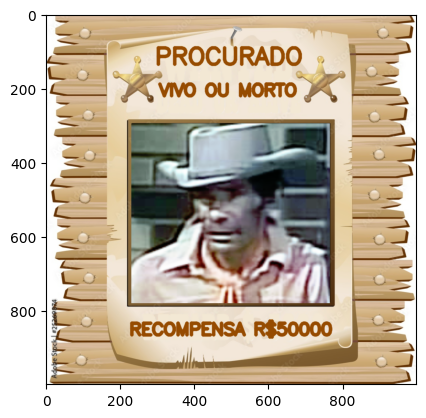

In [ ]:
# Lendo a imagem e convertendo para RGB
cartaz = cv2.imread('figs/procurado.jpg')
cartaz = cv2.cvtColor(cartaz, cv2.COLOR_BGR2RGB)
textoCima = cartaz[80:280, 290:690]
textoBaixo = cartaz[795:890, 255:750]

tripaSeca = cv2.imread('figs/tripaSeca.png')
tripaSeca = cv2.cvtColor(tripaSeca, cv2.COLOR_BGR2RGB)
tripaSecaRosto = tripaSeca[50:198, 350:498]

# Definindo o limiar para a cor marrom
limiar = 138

# Criando a máscara para a cor marrom
maskBrown = ((textoCima[:, :, 0] < limiar) &
             (textoCima[:, :, 0] > textoCima[:, :, 1]) &
             (textoCima[:, :, 0] > textoCima[:, :, 2]))

limiar2 = 140
maskBrown2 = ((textoBaixo[:, :, 0] < limiar2) &
             (textoBaixo[:, :, 0] > textoBaixo[:, :, 1]) &
             (textoBaixo[:, :, 0] > textoBaixo[:, :, 2]))

textoCima[maskBrown] = np.array([243, 232, 212])
textoBaixo[maskBrown2] = np.array([243, 232, 212])

# aplicando filtro passa baixa
dimMascara = 5
filtroMediana1 = cv2.medianBlur(textoCima, dimMascara)
filtroMediana2 = cv2.medianBlur(textoBaixo, dimMascara)
cartaz[795:890, 255:750] = filtroMediana2

# colocando texto
org = (4, 55)
color = (150, 75, 0)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 2.1
thickness = 8
image = cv2.putText(filtroMediana1, 'PROCURADO', org, font,
                   fontScale, color, thickness, cv2.LINE_AA)
org2 = (15, 140)
fontScale2 = 1.5
image = cv2.putText(filtroMediana1, 'VIVO OU MORTO', org2, font,
                   fontScale2, color, thickness, cv2.LINE_AA)

org3 = (225, 865)
fontScale3 = 1.5
image2 = cv2.putText(cartaz, 'RECOMPENSA R$50000', org3, font,
                   fontScale3, color, thickness, cv2.LINE_AA)

# adicionando o texto de cima na imagem completa
cartaz[80:280, 290:690] = filtroMediana1

# aplicando filtro passa baixa no cartaz inteiro para deixar um pouco borrado
dimMascara2 = 3
cartazPassaBaixa = cv2.medianBlur(cartaz, dimMascara2)

# aplicando equalização no rosto do tripa seca
red, green, blue = cv2.split( tripaSecaRosto )

redEqualizado = cv2.equalizeHist(red)
greenEqualizado = cv2.equalizeHist(green)
blueEqualizado = cv2.equalizeHist(blue)

histRed = cv2.calcHist([redEqualizado], [0], None,
                       [256], [0,256])

histGreen = cv2.calcHist([greenEqualizado], [0], None,
                       [256], [0,256])

histBlue = cv2.calcHist([blueEqualizado], [0], None,
                       [256], [0,256])

tripaSecaRosto = cv2.merge([redEqualizado, greenEqualizado, blueEqualizado] )

# colocando o rosto do tripa seca no cartaz
altura_tripa_seca = 485
largura_tripa_seca = 535

tripaSeca_redimensionado = cv2.resize(tripaSecaRosto, (largura_tripa_seca, altura_tripa_seca))

posicao_x = 230
posicao_y = 295

cartaz_com_tripaSeca = cartazPassaBaixa.copy()
cartaz_com_tripaSeca[posicao_y:posicao_y+altura_tripa_seca, posicao_x:posicao_x+largura_tripa_seca] = tripaSeca_redimensionado

# salvando a imagem em figs_resultado
cartazTripaSecaBGR = cv2.cvtColor(cartaz_com_tripaSeca, cv2.COLOR_RGB2BGR)
cv2.imwrite("figs_resultado/ex02_tripaSeca_procurado.png", cartazTripaSecaBGR)

# Exibindo a imagem resultante
plt.imshow(cartaz_com_tripaSeca)
plt.show()


----
## Exercicio 3

Remova o ruído da imagem **figs/faculdade.png** usando operações morfológicas. O resultado mínimo esperado é apresentado na imagem **figs/faculdade_corrigida.png**.

Salve a imagem resultante no caminho **figs_resultado/ex03.png**.

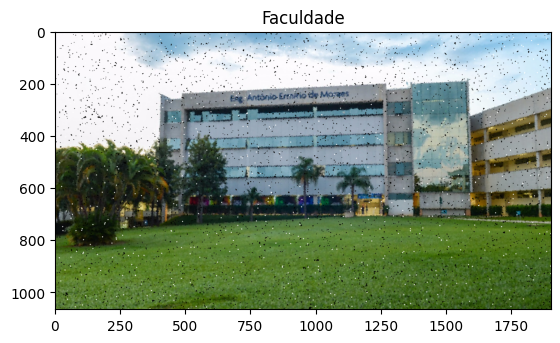

In [ ]:
faculdadeGabarito = cv2.imread("figs/faculdade_corrigida.png")
faculdadeGabaritoRGB = cv2.cvtColor(faculdadeGabarito, cv2.COLOR_BGR2RGB)

# lendo a imagem
faculdade = cv2.imread("figs/faculdade.png")
faculdade = cv2.cvtColor(faculdade, cv2.COLOR_BGR2RGB)

# elemento estruturante
elemEstrut2 = cv2.getStructuringElement(
    cv2.MORPH_ELLIPSE, (3,3))

# erosão
imgErosao = cv2.erode(faculdade, elemEstrut2)

# dilatação
imgDilate = cv2.dilate(faculdade, elemEstrut2)

# abertura
imgAbertura2 = cv2.dilate( imgErosao, elemEstrut2 )

# fechamento da abertura
dilataAbertura = cv2.dilate(imgAbertura2, elemEstrut2)
fechaAbre = cv2.dilate(dilataAbertura, elemEstrut2)

# erosão novamente
erosao2 = cv2.erode(fechaAbre, elemEstrut2)

# abertura 2
abertura2 = cv2.dilate( erosao2, elemEstrut2 )

# erosão 3
erosao3 = cv2.erode(abertura2, elemEstrut2)

# abertura 3
abertura3 = cv2.dilate( erosao3, elemEstrut2 )

# erosão 4
erosao4 = cv2.erode( abertura3, elemEstrut2 )

# salvando a imagem em figs_resultado
faculdadeBGR = cv2.cvtColor(erosao4, cv2.COLOR_RGB2BGR)
cv2.imwrite("figs_resultado/ex03.png", faculdadeBGR)

plt.title("Faculdade")
plt.imshow(erosao4)
plt.show()

----
## Exercicio 4

Crie uma matriz usando a biblioteca numpy. Depois, transforme essa matriz em uma imagem que corresponda a bandeira mostrada na figura **figs/bandeira.png**

Para gerar a bandeira, você poderá fazer apenas as seguintes operações:

- operações morfológicas nos símbolos contidos na imagem **figs/simbolos.png**;
- operações aritméticas entre a matriz e os símbolos contidos na imagem **figs/simbolos.png**;
- operações matriciais, tanto para gerar e transformar cores, quanto para gerar os retângulos que fazem parte da bandeira.

Salve a imagem resultante no caminho **figs_resultado/ex04_bandeira.png**

Obs: as únicas funções prontas da biblioteca OpenCV que podem ser usadas neste exercícios são as que executam operações morfológicas.

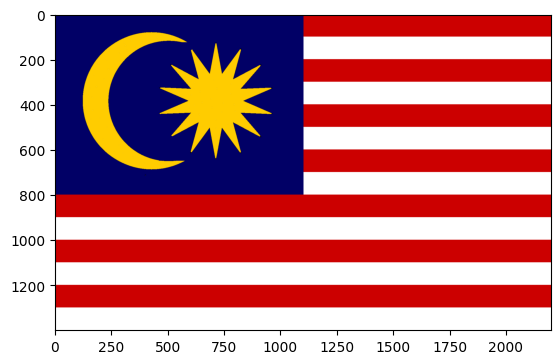

In [ ]:
# bandeira gabarito
bandeira = cv2.imread('figs/bandeira.png')
bandeiraRGB = cv2.cvtColor(bandeira, cv2.COLOR_BGR2RGB)

# simbolos
simbolos = cv2.imread("figs/simbolos.png", cv2.IMREAD_UNCHANGED)
simbolosAlpha = cv2.cvtColor(simbolos, cv2.COLOR_BGRA2RGB)

# gerando a bandeira com matriz
mat = np.zeros([1400, 2200, 3], dtype=np.uint8)
mat[:,:,:] = 255

stripe = 100

for y in range(0, 1300, stripe * 2):
    mat[y:y+stripe, :] = [204, 0, 0]

mat[:800, :1100, :] = [1,0,102]

# transformando a lua e a estrela em amarelo
simbolosAlpha[ simbolos[:, :, 3]==0 ] = [1,0,102]
# aplica erosao para retirar ruidos
elemEstrut1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
simbolosAlpha_erode1 = cv2.erode(simbolosAlpha, elemEstrut1)

mask = (
        (simbolosAlpha_erode1[:,:,0]==0) &
        (simbolosAlpha_erode1[:,:,1]==0) &
        (simbolosAlpha_erode1[:,:,2]==0)
       )

simbolosAlpha_erode1[mask] = [255,204,0]

# colocando sol na frente da lua e juntando com a bandeira final
estrela = simbolosAlpha_erode1[645:,45:550]
lua = simbolosAlpha_erode1[0:650,:]

altura_lua = 655
largura_lua = 591

lua_redimensionado = cv2.resize(lua, (largura_lua, altura_lua))

posicao_lua_x = 100
posicao_lua_y = 60

bandeira_com_lua = mat.copy()
bandeira_com_lua[posicao_lua_y:posicao_lua_y+altura_lua, posicao_lua_x:posicao_lua_x+largura_lua] = lua_redimensionado

altura_estrela = 525
largura_estrela = 505

estrela_redimensionado = cv2.resize(estrela, (largura_estrela, altura_estrela))

posicao_estrela_x = 460
posicao_estrela_y = 125

bandeira_com_lua_e_estrela = bandeira_com_lua.copy()
bandeira_com_lua_e_estrela[posicao_estrela_y:posicao_estrela_y+altura_estrela, posicao_estrela_x:posicao_estrela_x+largura_estrela] = estrela_redimensionado

# salvando a imagem em figs_resultado
bandeira_com_lua_e_estrelaBGR = cv2.cvtColor(bandeira_com_lua_e_estrela, cv2.COLOR_RGB2BGR)
cv2.imwrite("figs_resultado/ex04_bandeira.png", bandeira_com_lua_e_estrelaBGR)

plt.imshow(bandeira_com_lua_e_estrela, 'gray', vmin=0, vmax=255)
plt.show()

----
## Exercicio 5

Crie uma função que receba uma imagem e modifique ela para que fique quadrada. Se a imagem estiver na orientação paisagem, você precisará adicionar espaço na parte superior e inferior. Da mesma forma, para retrato (mais alto que largo), você adicionará espaço nas laterais. Certifique-se de que seu programa centralize a imagem entre o espaço.

Para preecher o novo espaço, você deverá testar apresentar as duas variações a seguir:
- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preenchê-lo com as $n$ linhas ou colunas vizinhas da imagem. Depois disso, você deverá aplicar uma filtro de média nessa região.
 - Você deverá criar seu próprio filtro de média. Não é permitido usar nenhuma função pronta para isso. Considere sempre que será criado padding na imagem para que o filtro resulte em uma imagem do mesmo tamanho. Considere também que a máscara sempre será quadrada e com tamanho ímpar.

- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preencher com a média de todos os valores RGB das $n$ linhas ou colunas vizinhas da imagem.

Teste a função nas imagens **figs/praia.jpg** e **figs/houses.jpg**.
Salve as imagens resultante nos caminhos **figs_resultado/ex05_praia.png** e **figs_resultado/ex05_houses.png**.

Obs. Neste exercício, não é permitido usar usada nenhuma função pronta da OpenCV. Além disso, as únicas funções prontas do Numpy que podem ser usada são np.pad, np.mean, np.sum, np.ones e np.zeros.

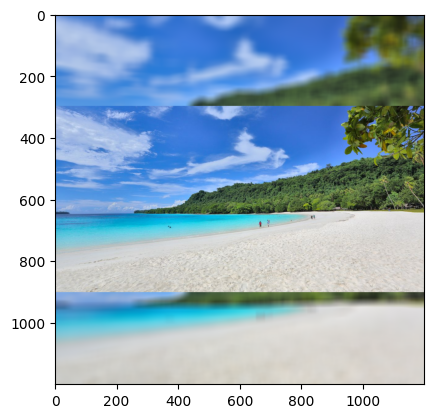

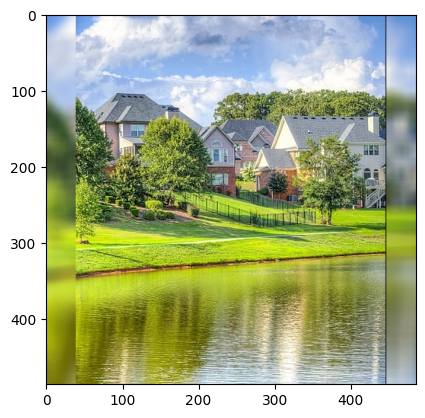

In [ ]:
# Função para mesclar as matrizes R, G e B em uma imagem colorida
def custom_merge(r_matrix, g_matrix, b_matrix):
    row, col = r_matrix.shape
    merged_image = np.zeros((row, col, 3), dtype=np.uint8)
    merged_image[:, :, 0] = r_matrix
    merged_image[:, :, 1] = g_matrix
    merged_image[:, :, 2] = b_matrix
    return merged_image

# Função de ordenação por inserção
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Função para aplicar filtro mediano
def median_filter(img, kernel):
    row, col, ch = img.shape
    row_mask = kernel
    col_mask = kernel
    inc = row_mask // 2

    # Pad nas bordas
    r_ext = np.pad(img[:, :, 0], inc, mode='edge')
    g_ext = np.pad(img[:, :, 1], inc, mode='edge')
    b_ext = np.pad(img[:, :, 2], inc, mode='edge')

    r_matrix = np.zeros((row, col), dtype=np.uint8)
    g_matrix = np.zeros((row, col), dtype=np.uint8)
    b_matrix = np.zeros((row, col), dtype=np.uint8)

    # Aplicação do filtro mediano
    for i in range(row):
        for j in range(col):
            red_aux = insertion_sort(r_ext[i:i + row_mask, j:j + col_mask].flatten())
            green_aux = insertion_sort(g_ext[i:i + row_mask, j:j + col_mask].flatten())
            blue_aux = insertion_sort(b_ext[i:i + row_mask, j:j + col_mask].flatten())

            index = len(red_aux) // 2
            r_matrix[i, j] = red_aux[index]
            g_matrix[i, j] = green_aux[index]
            b_matrix[i, j] = blue_aux[index]

    median_image = custom_merge(r_matrix, g_matrix, b_matrix)
    return median_image

# Função para aplicar filtro de média
def mean_filter(img, kernel):
    row, col, ch = img.shape
    row_mask = kernel
    col_mask = kernel
    inc = row_mask // 2

    # Pad nas bordas
    r_ext = np.pad(img[:, :, 0], inc, mode='edge')
    g_ext = np.pad(img[:, :, 1], inc, mode='edge')
    b_ext = np.pad(img[:, :, 2], inc, mode='edge')

    r_matrix = np.zeros((row, col), dtype=np.uint8)
    g_matrix = np.zeros((row, col), dtype=np.uint8)
    b_matrix = np.zeros((row, col), dtype=np.uint8)

    # Aplicação do filtro de média
    for i in range(row):
        for j in range(col):
            r_matrix[i, j] = np.mean(r_ext[i:i + row_mask, j:j + col_mask]).astype(np.uint8)
            g_matrix[i, j] = np.mean(g_ext[i:i + row_mask, j:j + col_mask]).astype(np.uint8)
            b_matrix[i, j] = np.mean(b_ext[i:i + row_mask, j:j + col_mask]).astype(np.uint8)

    mean_image = custom_merge(r_matrix, g_matrix, b_matrix)
    return mean_image

# Função para converter a imagem para formato quadrado
def toSquare(img):
    alt, larg = img.shape[:2]

    if alt > larg:
        # Imagem em modo retrato (mais alta que larga)
        nlarg = alt - larg
        half_extra = nlarg // 2
        extra_size = nlarg - half_extra * 2
        imagem_com_borda = np.zeros((alt, alt, 3), dtype=np.uint8)
        imagem_com_borda[:, half_extra:half_extra + larg, :] = img

        # Preencher bordas laterais com filtro de média
        left_cols = mean_filter(img[:, :half_extra + extra_size // 2, :], 19)
        right_cols = mean_filter(img[:, -half_extra - extra_size // 2:, :], 19)

        imagem_com_borda[:, :half_extra + extra_size // 2, :] = left_cols
        imagem_com_borda[:, -half_extra - extra_size // 2:, :] = right_cols

    elif larg > alt:
        # Imagem em modo paisagem (mais larga que alta)
        nAlt = larg - alt
        half_extra = nAlt // 2
        extra_size = nAlt - half_extra * 2
        imagem_com_borda = np.zeros((larg, larg, 3), dtype=np.uint8)
        imagem_com_borda[half_extra:half_extra + alt, :, :] = img

        # Preencher bordas superior e inferior com filtro de média
        top_rows = mean_filter(img[:half_extra + extra_size // 2, :, :], 29)
        bottom_rows = mean_filter(img[-half_extra - extra_size // 2:, :, :], 29)

        imagem_com_borda[:half_extra + extra_size // 2, :, :] = top_rows
        imagem_com_borda[-half_extra - extra_size // 2:, :, :] = bottom_rows

    else:
        # Imagem já é quadrada
        return img

    return imagem_com_borda

# Carregar e processar as imagens
praia = cv2.imread("figs/praia.jpg")
praiaRgb = cv2.cvtColor(praia, cv2.COLOR_BGR2RGB)

houses = cv2.imread("figs/houses.jpg")
housesRgb = cv2.cvtColor(houses, cv2.COLOR_BGR2RGB)

# Salvar as imagens em figs_resultado
imagemPraiaFinal = cv2.cvtColor(toSquare(praiaRgb), cv2.COLOR_RGB2BGR)
cv2.imwrite("figs_resultado/ex05_praia.png", imagemPraiaFinal)

imagemHousesFinal = cv2.cvtColor(toSquare(housesRgb), cv2.COLOR_RGB2BGR)
cv2.imwrite("figs_resultado/ex05_houses.png", imagemHousesFinal)

# Exibir as imagens
plt.imshow(toSquare(praiaRgb))
plt.show()

plt.imshow(toSquare(housesRgb))
plt.show()

## Exercicio 6

Separe os círculos das linhas na **figs/circulos_retas.png**. Salve as imagens resultantes nos caminhos **figs_resultado/circulo.png** e **figs_resultado/linha.png**. A imagem **figs_resultado/ex06_circulo.png** deve conter apenas círculos e a imagem **figs_resultado/ex06_linha.png** deve conter apenas linhas. Para conseguir separar os objetos, você só pode aplicar operações morfológicas, limiarização, operações aritméticas (soma, subtração, etc), operações lógicas (AND, OR, etc) e rotação.

Obs. A biblioteca OpenCV só pode ser usada para criar erosão,  dilatação e para criar os elementos estruturantes. Qualquer outra operação morfológica deve ser feita combinando erosão ou dilatação, sem usar nenhuma função pronta.

A biblioteca OpenCV também pode ser usada para fazer operações lógicas, operações aritméticas e rotação.  

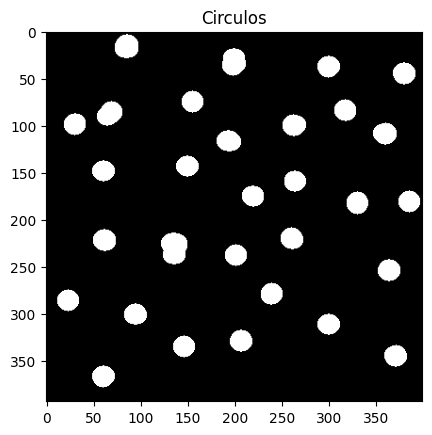

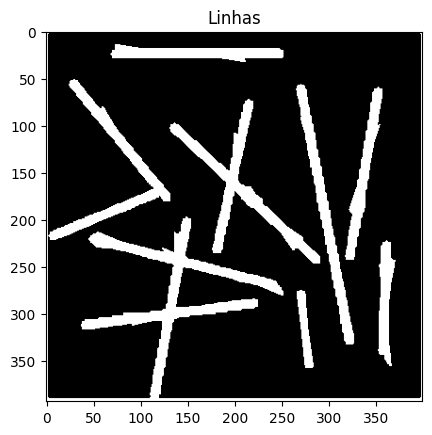

In [ ]:
# Carregar a imagem
imagem = cv2.imread('figs/circulos_retas.png', cv2.IMREAD_GRAYSCALE)
imagem = cv2.threshold(imagem, 127, 255, cv2.THRESH_BINARY)[1]

# Obter as dimensões da imagem
larg, altura = imagem.shape

# separando os circulos
elemento_estruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))

# Erosão para eliminar as linhas dos círculos
imagemErode = cv2.erode(imagem, elemento_estruturante)

# abertura para conseguir os circulos
imagemAberta = cv2.dilate(imagemErode, elemento_estruturante)

# separando as linhas
# Inicializar uma matriz para armazenar o resultado
linhas = np.zeros((larg, altura), dtype=np.uint8)

# Loop para aplicar operações morfológicas
for i in range(1, 356):
    # Criar o elemento estruturante
    se = np.zeros((81, 81), dtype=np.uint8)
    se[40, :] = 255

    # Aplicar rotação no elemento estruturante
    radian = i * (np.pi / 180)
    matriz_rotacao = cv2.getRotationMatrix2D((se.shape[1] // 2, se.shape[0] // 2), i, 1)
    se_rotacionado = cv2.warpAffine(se, matriz_rotacao, (se.shape[1], se.shape[0]))

    # Aplicar a operação de abertura
    opening = cv2.morphologyEx(imagem, cv2.MORPH_OPEN, se_rotacionado)

    # Adicionar o resultado à matriz linhas
    linhas = cv2.add(linhas, opening)

# salvando a imagem em figs_resultado
imagemAbertaBGR = cv2.cvtColor(imagemAberta, cv2.COLOR_GRAY2BGR)
cv2.imwrite("figs_resultado/ex06_circulo.png", imagemAbertaBGR)

linhasBGR = cv2.cvtColor(linhas, cv2.COLOR_GRAY2BGR)
cv2.imwrite("figs_resultado/ex06_linha.png", linhasBGR)


# Circulos
plt.imshow(imagemAberta, cmap='gray')
plt.title('Circulos')
plt.show()

# Linhas
plt.imshow(linhas, cmap='gray')
plt.title('Linhas')
plt.show()

----
## Exercicio 7

Com base nas noções de vizinhança, adjacência e componentes conexos ensinados na disciplina, crie uma função que receba uma imagem com cores preto e branco e conte quando objetos brancos existem nela. Considere uma conectividade-4.

Teste sua função na imagem **figs/circles.png**

In [ ]:
def custom_connected_components(image):
    # Obtem as dimensões da imagem
    rows, cols = image.shape

    # Inicializa uma matriz para armazenar os rótulos dos componentes conectados
    labels = np.zeros_like(image)

    # Inicializa um contador para acompanhar o número de componentes conectados
    label_count = 1

    # Inicializa uma pilha para armazenar os pixels a serem processados
    stack = []

    # Itera sobre todos os pixels da imagem
    for i in range(rows):
        for j in range(cols):
            # Verifica se o pixel é branco (255) e não foi rotulado
            if image[i][j] == 255 and labels[i][j] == 0:
                # Adiciona o pixel à pilha para iniciar um novo componente conectado
                stack.append((i, j))
                # Executa a busca em profundidade (DFS) para rotular o componente conectado
                while stack:
                    x, y = stack.pop()
                    # Verifica se o pixel está dentro dos limites da imagem e é branco e não rotulado
                    if 0 <= x < rows and 0 <= y < cols and image[x][y] == 255 and labels[x][y] == 0:
                        # Rotula o pixel atual com o contador de rótulo atual
                        labels[x][y] = label_count
                        # Adiciona os vizinhos à pilha para processamento posterior
                        stack.extend([(x-1, y), (x+1, y), (x, y-1), (x, y+1)])

                # Incrementa o contador de rótulo para o próximo componente conectado
                label_count += 1

    # Retorna o número total de componentes conectados encontrados na imagem
    return label_count - 1

# Carrega a imagem e converte para binária
circles = cv2.imread('figs/circles.png', cv2.IMREAD_GRAYSCALE)
_, circles = cv2.threshold(circles, 127, 255, cv2.THRESH_BINARY)

# Executa a rotulagem dos componentes conectados
num_objects = custom_connected_components(circles)

# Imprime o número de objetos brancos encontrados na imagem
print("Número de objetos brancos na imagem:", num_objects)

Número de objetos brancos na imagem: 4


----
## Exercicio 8

Extraia os contornos da rachadura da imagem **figs/rachadura.jpg**. Para isso, é permitido aplicar apenas as seguintes operações: alguma técnica de segmentação, alguma técnica de limiarização automática e algum filtro.
 - Limite-se aos métodos ensinados na disciplina

O resultado mínimo esperado é apresentado na imagem **figs_resultado/rachadura_contorno.png**

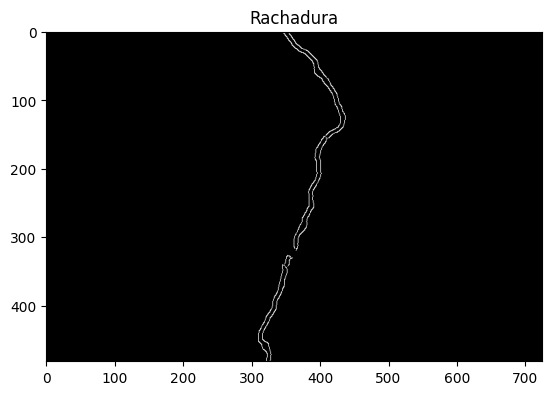

In [ ]:
rachadura = cv2.imread('figs/rachadura.jpg', cv2.IMREAD_GRAYSCALE)

# Filtro gaussiano para suavização
imgSuavizada = cv2.GaussianBlur(rachadura, (13, 13), 0)

# Canny
imgCanny = cv2.Canny(imgSuavizada, 100, 200)

# Otsu
def otsu(img):
    limiar, imgBin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return imgBin

# Aplicar Otsu na imagem Canny
imgOtsu = otsu(imgCanny)

# Salvando a imagem final
imgOtsuBGR = cv2.cvtColor(imgOtsu, cv2.COLOR_GRAY2BGR)
cv2.imwrite("figs_resultado/rachadura_contorno.png", imgOtsuBGR)

# Exibir a imagem com os contornos
plt.imshow(imgOtsu, cmap='gray')
plt.title('Rachadura')
plt.show()